In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
import seaborn as sns
from sklearn.neural_network import MLPRegressor
# Libraries
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
# !cd sample_data
!git clone https://github.com/adityachoudary54/iotDatasets

Cloning into 'iotDatasets'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 176 (delta 0), reused 0 (delta 0), pack-reused 172
Receiving objects: 100% (176/176), 233.05 MiB | 32.32 MiB/s, done.
Resolving deltas: 100% (68/68), done.
Checking out files: 100% (113/113), done.


In [ ]:
!unzip /content/iotDatasets/Major_Ions_csv.zip

Archive:  /content/iotDatasets/Major_Ions_csv.zip
  inflating: Major_Ions.csv          


In [ ]:
df=pd.read_csv("/content/Major_Ions.csv")
df.describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,9,13,20,21,28,29,31,32,52,53,56,58,59,62,67,68,76,77,80,82,83,88,89,92,107,109,110,112,113,118,119,121,122,124,125,127,128,130,131,133,134,136,137,140,142,143,145,146,148,149,151,152,155,161,166,170,172,173,177,179,180,182,183,185,186,191,192) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,proprietary_data,dec_lat_va,dec_long_va,elevation_dem,well_depth_ft,well_depth2_ft,hole_depth_va,top_of_screen_va,bot_of_screen_va,csng_bottom_max_va,preferred_max_depth,preferred_min_depth,well_yield,WL_ft,Ag_ugL,Al_ugL,Alk_mgL,As_ugL,B_ugL,Ba_ugL,Be_ugL,Br_mgL,Ca_mgL,Cd_ugL,Cl_mgL,Co_ugL,CO3_mgL,Cr_ugL,Cu_ugL,Dens_gmL,DO_mgL,F_mgL,Fe_mgL,HCO3_mgl,K_mgL,Li_ugL,Mg_mgL,Mn_ugL,Mo_ugL,Na_mgL,...,model_pp_Anhydrite_closed_2x,model_pp_Barite_closed_2x,model_pp_Calcite_closed_2x,model_pp_Celestite_closed_2x,model_pp_Chalcedony_closed_2x,model_pp_Gypsum_closed_2x,model_pp_Halite_closed_2x,model_pp_Ferrihydrite_closed_2x,model_pp_mgL_closed_2x,model_os_p_closed_2x,model_pp_Anhydrite_closed_4x,model_pp_Barite_closed_4x,model_pp_Calcite_closed_4x,model_pp_Celestite_closed_4x,model_pp_Chalcedony_closed_4x,model_pp_Gypsum_closed_4x,model_pp_Halite_closed_4x,model_pp_Ferrihydrite_closed_4x,model_pp_mgL_closed_4x,model_os_p_closed_4x,model_pp_Anhydrite_closed_8x,model_pp_Barite_closed_8x,model_pp_Calcite_closed_8x,model_pp_Celestite_closed_8x,model_pp_Chalcedony_closed_8x,model_pp_Gypsum_closed_8x,model_pp_Halite_closed_8x,model_pp_Ferrihydrite_closed_8x,model_pp_mgL_closed_8x,model_os_p_closed_8x,model_pp_Anhydrite_closed_16x,model_pp_Barite_closed_16x,model_pp_Calcite_closed_16x,model_pp_Celestite_closed_16x,model_pp_Chalcedony_closed_16x,model_pp_Gypsum_closed_16x,model_pp_Halite_closed_16x,model_pp_Ferrihydrite_closed_16x,model_pp_mgL_closed_16x,model_os_p_closed_16x
count,123699.000000,122118.000000,122118.000000,123699.000000,116934.000000,17259.000000,49518.000000,51139.000000,51332.000000,52147.000000,118245.000000,58764.000000,32904.000000,16555.000000,22962.000000,5.437300e+04,122820.000000,65129.000000,7.210500e+04,5.892000e+04,43796.000000,28483.000000,123631.000000,33084.000000,123560.000000,45786.000000,57324.000000,52645.000000,56623.000000,534.000000,52729.000000,94956.000000,109028.000000,70081.00000,123663.000000,4.898700e+04,123448.000000,99884.000000,47882.000000,123673.000000,...,120069.0,1.200690e+05,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,1.200690e+05,1.200690e+05,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,1.200690e+05,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,1.200690e+05,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000,120069.000000
mean,0.012781,38.497797,-98.577642,1610.287776,283.465211,303.435481,312.431237,224.750048,318.876171,254.329586,282.442633,220.932569,336.179914,72.402773,8.938154,1.945314e+02,245.274251,24.411595,4.529825e+03,2.760659e+02,2.354804,2.405806,80.556586,4.083448,372.280586,6.349947,4.843544,10.189388,38.286051,12.182547,4.139961,0.754464,1.557994,303.88312,9.872577,1.354151e+03,32.648291,260.659716,34.094129,276.334081,...,0.0,1.242268e-07,0.000371,0.000002,0.000208,0.000117,0.001937,0.000019,185.563805,1.409950,3.772831e-07,1.269362e-07,0.000619,0.000003,0.000268,0.000269,0.003375,0.000019,324.559183,2.415955,0.000003,1.306853e-07,0.000813,0.000004,0.000300,0.000387,0.004362,0.000019,424.506621,4.305608,0.000010,1.297885e-07,0.000944,0.000004,0.000316,0.000464,0.005097,0.000019,496.023825,8.046034
std,0.112329,6.076648,14.058272,2040.489964,439.726240,526.976843,470.932712,358.513907,439.194942,400.546756,442.271381,358.789946,860.125914,961.715446,366.830131,7.432225e+03,1388.962599,1908.269261,5.325471e+05,1.129398e+04,77.040703,44.631696,355.846056,92.345480,5512.248576,185.770365,187.761858,332.831353,1742.804659,104.796283,3.238506,3.367791,18.786634,2083.84977,140.062425,9.973485e+04,153.338265,5217.920434,3828.054952,3128.951299,...,0.0,9.172099e-06,0.000481,0.000022,0.000264,0.001020,0.076146,0.000132,4547.204142,13.089227,1.184595e-04,9.194063e-06,0.000641,0.000030,0.000272,0.001596,0.117049,0.0

In [ ]:
df=df[['SC_uScm','Cl_mgL','Na_mgL','HCO3_mgl','model_SAR']]
# df[['SC_uScm','Cl_mgL','Na_mgL','HCO3_mgl','model_SAR']]
# df=df.dropna()
# df.describe()
df['HCO3_mgl'].isna().sum()

53618

In [ ]:
# tempDF[tempDF['Cl_mgL']<50].describe()

,Unnamed: 0,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass
count,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000,46415.000000
mean,35924.731509,686.087906,14.152077,65.881722,278.163277,4.866358,53.431474,18.713459,0.398650,2.864423,4.560054,1.335787,0.779727,0.686088,57.549359,74.901274,30.509186,35.742029,33.323555,46.937447,0.988086
std,19099.137597,733.044433,12.397378,133.799617,2533.074275,14.527403,77.411058,33.287964,0.349222,5.817375,41.525808,1.935276,1.386999,0.733044,20.247289,28.789342,23.153453,24.243519,21.599349,12.194772,0.788846
min,13.000000,10.000000,0.050000,0.100000,0.100000,0.005419,0.010000,0.004000,0.001408,0.004348,0.001639,0.000250,0.000167,0.010000,0.000000,0.175000,0.098592,0.076087,0.004217,7.201550,0.000000
25%,20691.500000,291.000000,4.190000,8.100000,135.000000,0.330508,15.000000,3.260000,0.118028,0.352174,2.213115,0.375000,0.135833,0.291000,44.471311,65.666667,19.225352,21.913043,22.104654,39.488243,0.000000
50%,37550.000000,500.000000,10.000000,20.600000,235.530000,0.755282,35.280000,9.100000,0.281690,0.895652,3.861148,0.882000,0.379167,0.500000,59.436475,88.490909,27.211268,29.902174,29.336294,46.993350,1.000000
75%,52149.500000,757.000000,21.000000,58.000000,345.000000,2.076839,70.000000,22.700000,0.591549,2.521739,5.655738,1.750000,0.945833,0.757000,72.909836,94.245455,32.338028,34.968417,34.612170,53.621448,1.000000
max,66612.000000,29900.000000,49.900000,3600.000000,544000.000000,1130.580186,9300.000000,960.000000,1.405634,156.521739,8918.032787,232.500000,40.000000,29.900000,100.000000,100.000000,100.000000,100.000000,99.999934,94.155324,4.000000


In [ ]:
tempDF=df.dropna()
tempDF.describe()

,Unnamed: 0,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass
count,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000
mean,33306.000000,1357.250536,204.251665,194.283393,306.083907,8.521152,69.220214,26.870587,5.753568,8.447104,5.017769,1.730505,1.119608,1.357251,56.653361,70.398169,43.065349,39.456499,37.569045,49.802346,1.168135
std,19229.661078,4518.059411,2525.823604,1400.424568,2135.804759,37.555357,190.359309,102.362717,71.149961,60.888025,35.013193,4.758983,4.265113,4.518059,19.145040,27.135308,30.351094,24.923341,24.257305,13.271075,0.883886
min,0.000000,10.000000,0.050000,0.100000,0.100000,0.005419,0.010000,0.004000,0.001408,0.004348,0.001639,0.000250,0.000167,0.010000,0.000000,0.175000,0.098592,0.000000,0.000000,7.201550,0.000000
25%,16653.000000,380.000000,6.500000,12.000000,158.000000,0.464939,16.020000,3.600000,0.183099,0.521739,2.590164,0.400500,0.150000,0.380000,43.452869,51.466667,23.169014,24.347826,23.177463,41.148472,1.000000
50%,33306.000000,666.000000,19.000000,41.000000,259.000000,1.366199,40.000000,10.690000,0.535211,1.782609,4.245902,1.000000,0.445417,0.666000,58.000000,82.200000,31.845070,33.250000,31.735499,48.955246,1.000000
75%,49959.000000,1340.000000,69.100000,146.000000,371.000000,5.177704,80.400000,26.700000,1.946479,6.347826,6.081967,2.010000,1.112500,1.340000,70.991803,92.058182,69.741784,48.768116,41.181754,56.657901,2.000000
max,66612.000000,241000.000000,194000.000000,121000.000000,544000.000000,6083.118289,27700.000000,9550.000000,5464.788732,5260.869565,8918.032787,692.500000,397.916667,241.000000,100.000000,100.000000,100.000000,100.000000,99.999934,96.539513,4.000000


In [ ]:
df[['SC_uScm','Cl_mgL','Na_mgL','HCO3_mgl','model_SAR','Ca_mgL','Mg_mgL']].head()

,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL
0,1300.0,210.0,120.0,NaN,0.0901,110.0,15.0
1,2500.0,620.0,450.0,98.0,0.4040,86.0,5.0
2,390.0,15.0,58.0,NaN,0.1004,23.0,1.4
3,3000.0,390.0,520.0,NaN,0.3748,110.0,22.0
4,870.0,110.0,180.0,150.0,0.6248,3.0,2.0


In [ ]:
#paramaeters we need
#EC #TDS #SAR #Boron, #Bicarbonate #Sodium #Magnesium #Calcium #Nitrate Nitrogen
#Iron Bicarbonate #chloride
#Conver mg/l to mmol/L dividing values with molar mass

In [ ]:
Na,Ca,Mg=120.0/23, 110/40, 15/24
Na/(Ca+Mg)**(0.5)

2.8399881075746993

In [ ]:
# Na,Ca,Mg=120.0/23, 110/40, 15/24
# Na,Ca,Mg=450.0/23, 86/40, 5/24

In [ ]:
# Na/(Ca+Mg)**(0.5)

12.740371239588875

In [ ]:
df=pd.read_csv('/content/iotDatasets/Water Quality Prediction/wqi_imp_badeWala.csv')
df.describe()

,Unnamed: 0,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm
count,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000,66613.000000
mean,33306.000000,1357.250536,204.251665,194.283393,306.083907,8.521152,69.220214,26.870587,5.753568,8.447104,5.017769,1.730505,1.119608,1.357251
std,19229.661078,4518.059411,2525.823604,1400.424568,2135.804759,37.555357,190.359309,102.362717,71.149961,60.888025,35.013193,4.758983,4.265113,4.518059
min,0.000000,10.000000,0.050000,0.100000,0.100000,0.005419,0.010000,0.004000,0.001408,0.004348,0.001639,0.000250,0.000167,0.010000
25%,16653.000000,380.000000,6.500000,12.000000,158.000000,0.464939,16.020000,3.600000,0.183099,0.521739,2.590164,0.400500,0.150000,0.380000
50%,33306.000000,666.000000,19.000000,41.000000,259.000000,1.366199,40.000000,10.690000,0.535211,1.782609,4.245902,1.000000,0.445417,0.666000
75%,49959.000000,1340.000000,69.100000,146.000000,371.000000,5.177704,80.400000,26.700000,1.946479,6.347826,6.081967,2.010000,1.112500,1.340000
max,66612.000000,241000.000000,194000.000000,121000.000000,544000.000000,6083.118289,27700.000000,9550.000000,5464.788732,5260.869565,8918.032787,692.500000,397.916667,241.000000


In [ ]:


# df['HCO3_mmol']
# df['SC_dSm']
# df['Cl_mmol']
# df['Na_mmol']
# df['model_SAR']

# 85-100 0.20 ≤ CE < 0.75   2 ≤ SAR° < 3  2 ≤ Na < 3  1 ≤ Cl < 4  1 ≤ HCO3 < 1.5

# 60-85 0.75 ≤ CE < 1.50 3 ≤ SAR° < 6 3 ≤ Na < 6 4 ≤ Cl < 7 1.5 ≤ HCO3 < 4.5

# 35-60 1.50 ≤ CE < 3.00 6 ≤ SAR° <12 6 ≤ Na < 9 7 ≤ Cl <10 4.5 ≤ HCO3 < 8.5

# 0-35 EC < 0.20 or EC ≥ 3.00 SAR° < 2 or SAR° ≥ 12 Na < 2 or Na ≥ 9 Cl < 1 or Cl ≥10 HCO3 < 1 or HCO3 ≥ 8.5


# Funtion to caluclate Qval
# def Qval(Qmax,Qmin, Xmax,Xmin, Xval):
#   val=Qmax-((Xval-Xmin)*(Qmax-Qmin))/(Xmax-Xmin)
#   return val


# QvalChemical=[]

# # df['HCO3_mmol']
# for item in df['HCO3_mmol']:
#   val=0
#   if(item>=1 and item<1.5):
#     val=Qval(100,85,1.5,1,item)  
#   elif(item>=1.5 and item<4.5):
#     val=Qval(85,60,4.5,1.5,item)
#   elif(item>=4.5 and item<8.5):
#     val=Qval(60,35,8.5,4.5,item)
#   elif(item<1):
#     val=Qval(35,0,1,0,item)
#   elif(item>=8.5):
#     val=Qval(35,0,df['HCO3_mmol'].max(),8.5,item)
#   QvalChemical.append(val)

# df['Q_hco3']=pd.DataFrame(QvalChemical)
# QvalChemical=[]

# # df['SC_dSm']
# for item in df['SC_dSm']:
#   val=0
#   if(item>=0.2 and item<0.75):
#     val=Qval(100,85,0.75,0.2,item)  
#   elif(item>=0.75 and item<1.5):
#     val=Qval(85,60,1.5,0.75,item)
#   elif(item>=1.5 and item<3):
#     val=Qval(60,35,3,1.5,item)
#   elif(item<0.2):
#     val=Qval(35,0,0.2,0,item)
#   elif(item>=3):
#     val=Qval(35,0,df['HCO3_mmol'].max(),3,item)
#   QvalChemical.append(val)

# df['Q_EC']=pd.DataFrame(QvalChemical)
# QvalChemical=[]


# # df['Cl_mmol']
# for item in df['Cl_mmol']:
#   val=0
#   if(item>=1 and item<4):
#     val=Qval(100,85,4,1,item)  
#   elif(item>=4 and item<7):
#     val=Qval(85,60,7,4,item)
#   elif(item>=7 and item<10):
#     val=Qval(60,35,10,7,item)
#   elif(item<1):
#     val=Qval(35,0,1,0,item)
#   elif(item>=10):
#     val=Qval(35,0,df['HCO3_mmol'].max(),10,item)
#   QvalChemical.append(val)

# df['Q_Cl']=pd.DataFrame(QvalChemical)
# QvalChemical=[]

# temp = []

# # df['Na_mmol']
# for item in df['Na_mmol']:
#   val=0
#   if(item>=2 and item<3):
#     val=Qval(100,85,3,2,item)  
#   elif(item>=3 and item<6):
#     val=Qval(85,60,6,3,item)
#   elif(item>=6 and item<9):
#     val=Qval(60,35,9,6,item)
#   elif(item<2):
#     val=Qval(35,0,2,0,item)
#   elif(item>=9):
#     val=Qval(35,0,df['Na_mmol'].max(),9,item)
#   temp.append(val)

# # print(temp[:100])

# df['Q_Na'] = pd.DataFrame(temp)

# temp = []

# # df['model_SAR']
# for item in df['model_SAR']:
#   val=0
#   if(item>=2 and item<3):
#     val=Qval(100,85,3,2,item)  
#   elif(item>=3 and item<6):
#     val=Qval(85,60,6,3,item)
#   elif(item>=6 and item<12):
#     val=Qval(60,35,12,6,item)
#   elif(item<2):
#     val=Qval(35,0,2,0,item)
#   elif(item>=12):
#     val=Qval(35,0,df['model_SAR'].max(),12,item)
#   temp.append(val)

# # print(temp[:100])
# df['Q_SAR'] = pd.DataFrame(temp)

In [ ]:
df.to_csv('water_quality_with_qval.csv')

In [ ]:
df.corr()

,Unnamed: 0,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass
Unnamed: 0,1.000000,-0.027014,-0.036896,-0.016654,0.015459,-0.034368,0.041410,0.057053,-0.036896,-0.016654,0.015459,0.041410,0.057053,-0.027014,-0.072651,-0.091578,-0.124143,-0.073481,-0.091381,-0.175481,-0.182812
SC_uScm,-0.027014,1.000000,0.896276,0.928691,0.024029,0.385231,0.513550,0.532906,0.896276,0.928691,0.024029,0.513550,0.532906,1.000000,-0.042419,-0.189575,0.016775,-0.005462,0.040924,-0.074662,-0.082469
Cl_mgL,-0.036896,0.896276,1.000000,0.965685,0.002604,0.314657,0.536076,0.515361,1.000000,0.965685,0.002604,0.536076,0.515361,0.896276,0.005376,-0.085136,-0.014204,-0.021037,0.004488,-0.047975,-0.048581
Na_mgL,-0.016654,0.928691,0.965685,1.000000,0.019980,0.430623,0.442932,0.481094,0.965685,1.000000,0.019980,0.442932,0.481094,0.928691,-0.027961,-0.121322,-0.003886,-0.019679,0.013711,-0.065017,-0.069624
HCO3_mgl,0.015459,0.024029,0.002604,0.019980,1.000000,0.060331,0.005688,0.011229,0.002604,0.019980,1.000000,0.005688,0.011229,0.024029,-0.053208,-0.009897,0.009593,0.010757,0.015240,-0.006133,-0.013168
model_SAR,-0.034368,0.385231,0.314657,0.430623,0.060331,1.000000,0.008053,0.031751,0.314657,0.430623,0.060331,0.008053,0.031751,0.385231,-0.111837,-0.113869,0.033340,0.001488,-0.000892,-0.066663,-0.077338
Ca_mgL,0.041410,0.513550,0.536076,0.442932,0.005688,0.008053,1.000000,0.528188,0.536076,0.442932,0.005688,1.000000,0.528188,0.513550,-0.006927,-0.113667,0.026808,0.019689,0.032731,-0.020313,-0.027302
Mg_mgL,0.057053,0.532906,0.515361,0.481094,0.011229,0.031751,0.528188,1.000000,0.515361,0.481094,0.011229,0.528188,1.000000,0.532906,-0.046355,-0.131601,0.013512,0.010582,0.034696,-0.048250,-0.052956
Cl_mmol,-0.036896,0.896276,1.000000,0.965685,0.002604,0.314657,0.536076,0.515361,1.000000,0.965685,0.002604,0.536076,0.515361,0.896276,0.005376,-0.085136,-0.014204,-0.021037,0.004488,-0.047975,-0.048581
Na_mmol,-0.016654,0.928691,0.965685,1.000000,0.019980,0.430623,0.442932,0.481094,0.965685,1.000000,0.019980,0.442932,0.481094,0.928691,-0.027961,-0.121322,-0.003886,-0.019679,0.013711,-0.065017,-0.069624


In [ ]:
# Electrical Condutivity (EC) 0.211
# Sodium (Na+) 0.204
# Bicarbonate (HCO3-) 0.202
# Chloride (Cl-) 0.194
# Sodium Adsorption Ration (SAR°) 0.189

#WQI calculation 
df['WQI']=df['Q_EC']*0.211+df['Q_Cl']*0.194+df['Q_Na']*0.204+df['Q_SAR']*0.189+df['Q_hco3']*0.202

temp_list=[]
for i in df['WQI']:
  i = int(i)
  if i>=85 and i<=100:
      temp_list.append(4)
  elif i>=70 and i<85:
      temp_list.append(3)
  elif i>=55 and i<70:
      temp_list.append(2)
  elif i>=40 and i<55:
      temp_list.append(1)
  elif i>=0 and i<40:
      temp_list.append(0)
df['wqiClass'] = temp_list
  

df.to_csv('water_quality_with_wqi.csv')
# df[df['WQI']>55].count()

In [ ]:
df.describe()

,Unnamed: 0,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass
count,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000
mean,18999.000000,431.700728,16.896927,24.623658,198.939477,1.465542,38.211039,11.896418,0.475970,1.070594,3.261303,0.955276,0.495684,0.431701,60.914822,78.373669,34.758402,34.308727,31.926011,48.617764,1.106108
std,10969.510776,224.434256,19.154012,23.282851,116.418176,3.351862,26.764632,11.283740,0.539550,1.012298,1.908495,0.669116,0.470156,0.224434,20.823856,30.011825,26.285034,26.019830,22.449292,13.932036,0.880934
min,0.000000,10.000000,0.050000,0.100000,0.100000,0.005419,0.010000,0.004000,0.001408,0.004348,0.001639,0.000250,0.000167,0.010000,0.131967,0.175000,0.098592,0.076087,0.004217,7.201550,0.000000
25%,9499.500000,255.000000,3.800000,6.930000,110.000000,0.305401,16.180000,3.410000,0.107042,0.301304,1.803279,0.404500,0.142083,0.255000,52.489754,84.200000,21.197183,19.478261,20.239364,40.642821,1.000000
50%,18999.000000,421.000000,10.000000,16.000000,196.000000,0.640762,33.000000,8.100000,0.281690,0.695652,3.213115,0.825000,0.337500,0.421000,64.439891,90.754545,29.084507,28.083696,27.921931,48.364170,1.000000
75%,28498.500000,594.000000,22.000000,35.200000,280.400000,1.414481,58.000000,17.100000,0.619718,1.530435,4.596721,1.450000,0.712500,0.594000,75.642077,95.336364,33.176056,32.717391,32.613256,54.897912,1.000000
max,37998.000000,1000.000000,100.000000,100.000000,903.000000,99.350442,100.000000,100.000000,2.816901,4.347826,14.803279,2.500000,4.166667,1.000000,100.000000,100.000000,100.000000,100.000000,99.999934,96.539513,4.000000


In [4]:
#Load the final dataset
df=pd.read_csv('/content/iotDatasets/Water Quality Prediction/NEW_water.csv')
df.head()
dfTemp=df

In [6]:
df.groupby('wqiClass').count()

,Unnamed: 0,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI
wqiClass,,,,,,,,,,,,,,,,,,,,
0,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885
1,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759
2,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288
3,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572
4,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495


In [ ]:
bins=[0,35,60,85,100]
Qcols=['Q_hco3',	'Q_EC',	'Q_Cl',	'Q_Na',	'Q_SAR'	]
rangedic={
    0:[],
    1:[],
    2:[],
    3:[]
}

def calcQrange(colname):
  ct=0
  global rangedic
  # print(df[colnae].value_counts(bins=bins, sort=False))
  for i in df[colname].value_counts(bins=bins, sort=False):
    # print(type(i))
    rangedic[ct].append(i) 
    ct+=1
for cols in Qcols:
  calcQrange(cols)  

print(rangedic)

arr=[]
for i in rangedic:
  arr.append(rangedic[i])

arr=np.array(arr)
print(arr)

np.savetxt('ot.csv',arr, delimiter=',')
# df[df['Q_EC']>=90].count()

{0: [5542, 6583, 32716, 31410, 32578], 1: [9947, 0, 0, 0, 794], 2: [20045, 3502, 0, 2784, 1948], 3: [2465, 27914, 5283, 3805, 2679]}
[[ 5542  6583 32716 31410 32578]
 [ 9947     0     0     0   794]
 [20045  3502     0  2784  1948]
 [ 2465 27914  5283  3805  2679]]


In [ ]:
cols=['Cl_mmol','Na_mmol','SC_dSm']
y = df['WQI']
x=df[cols]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, shuffle=True)
results=[]

In [ ]:
# Priniting Metrics for all Regression
def allRegressionResults(x_test,y_test,reg,name):
    a=reg.predict(x_test)
    print('mse: %.5f'%mean_squared_error(y_test,a))
    print('mae: %.5f'%mean_absolute_error(y_test,a))
    # print('r2_score:%.5f'%r2_score(a,y_test))
    print(f'r2_score: {reg.score(x_test,y_test)}')
    # folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    # score=cross_val_score(reg,x,y,scoring='r2', cv=folds)
    # print(f'5-fold cross validation r2 score{score}')
    if(name!='Polynomial'):
      results.append([name,mean_squared_error(y_test,a),mean_absolute_error(y_test,a),reg.score(x_test,y_test)])

# Plotting results
def plotRes(y,y_pred):
    plt.figure(figsize=(20,10))
    indexes=np.arange(y.shape[0])
    plt.scatter(indexes,y,label = 'y_actual')
    plt.scatter(indexes,y_pred,label = 'y_pred')
    plt.legend()
    plt.show()

# Plotting how well the linear regression constructs the line
def inputVsOutputPlot(x_test,y_test,reg):
    X_test = np.asarray(x_test)
    Y_test = np.asarray(y_test)
    coeff = reg.coef_
    Y_pred = reg.predict(x_test)
    print("Equation values come from the formula")
    print("(y(actual/pred) - x[input_features except index]*coeff[input_features except index])/coeff[index]")
    for index in range(X_test.shape[1]):
        input_features = [i for i in range(X_test.shape[1]) if i!=index]
        y_values_pred = (Y_pred - np.dot(X_test[:,input_features],coeff[input_features]))/coeff[index] 
        y_values_actual = (Y_test - np.dot(X_test[:,input_features],coeff[input_features]))/coeff[index] 
        
        # print(x_values.shape,y_values_pred.shape)
        # print(x_test.columns[index])
        plt.figure(figsize=(8,5))
        plt.title(f"Relationship of {x_test.columns[index]} vs Equation values")
        plt.scatter(y_values_actual,X_test[:,index],label = 'y_actual')
        plt.plot(y_values_pred,X_test[:,index],label = 'y_pred',c='r')
        plt.xlabel(f"{x_test.columns[index]}")
        plt.ylabel(f"Equation values")
        plt.legend()
        plt.show()

In [ ]:
#Linear Model
reg=linear_model.LinearRegression(normalize=False)
reg.fit(x_train,y_train)
allRegressionResults(x_test,y_test,reg,'Linear Regression')
print(results)

mse: 115.09200
mae: 8.76955
r2_score: 0.40552502633410964
[['Linear Regression', 115.09199958365768, 8.769548797599239, 0.40552502633410964]]


Equation values come from the formula
(y(actual/pred) - x[input_features except index]*coeff[input_features except index])/coeff[index]


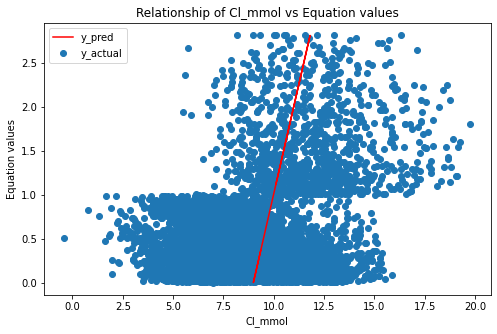

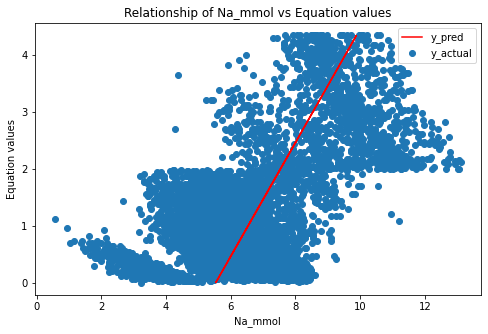

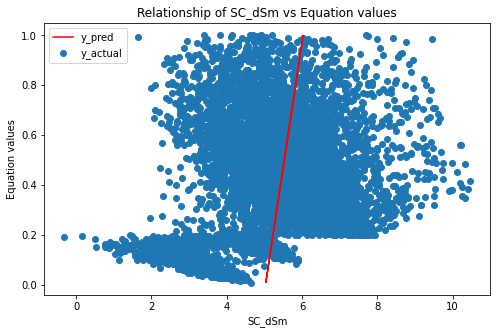

In [ ]:
inputVsOutputPlot(x_test,y_test,reg)
# print(x_test.describe())

In [ ]:
#Random Forest
reg=RandomForestRegressor()
reg.fit(x_train,y_train)
allRegressionResults(x_test,y_test,reg,'Random Forest')

mse: 17.95079
mae: 2.48521
r2_score: 0.9072802862180359


In [ ]:
# Extra trees regressor
reg = ExtraTreesRegressor()
reg.fit(x_train,y_train)
allRegressionResults(x_test,y_test,reg,'Extra Trees')

mse: 18.66153
mae: 2.53013
r2_score: 0.9036091813968313


In [ ]:
#Bayesian Ridge
reg=linear_model.BayesianRidge(normalize=False)
# init = [1., 1e-4]
reg.set_params(alpha_init=1.9, lambda_init=1)
reg.fit(x_train,y_train)
allRegressionResults(x_test,y_test,reg,'Bayesian Ridge')

mse: 115.09158
mae: 8.76954
r2_score: 0.4055272113721231


In [ ]:
print(results)

[['Linear Regression', 115.09199958365768, 8.769548797599239, 0.40552502633410964], ['Random Forest', 17.950793107714908, 2.4852090170243555, 0.9072802862180359], ['Extra Trees', 18.66152915762487, 2.530133195119222, 0.9036091813968313], ['Bayesian Ridge', 115.09157655425308, 8.769542612964786, 0.4055272113721231], ['Gradient Boosting', 19.39972908714375, 2.9151772039721897, 0.8997962197205345]]


In [ ]:
# Polynomial
for degree in range(1,10):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_pred=np.array(model.predict(x_test))
    print(f'for degree {degree}')
    allRegressionResults(x_test,y_test,model,'Polynomial')

for degree 1
mse: 115.09200
mae: 8.76955
r2_score: 0.40552502633410964
for degree 2
mse: 82.85031
mae: 7.07022
r2_score: 0.572060318988769
for degree 3
mse: 52.65471
mae: 5.47068
r2_score: 0.7280270873883405
for degree 4
mse: 51.17231
mae: 5.39426
r2_score: 0.7356839997365086
for degree 5
mse: 42.90502
mae: 4.77066
r2_score: 0.7783863143857414
for degree 6
mse: 36.25253
mae: 4.25769
r2_score: 0.8127478838102271
for degree 7
mse: 33.46218
mae: 3.95999
r2_score: 0.8271606461088729
for degree 8
mse: 31.93140
mae: 3.83805
r2_score: 0.8350674529407837
for degree 9
mse: 30.09754
mae: 3.68498
r2_score: 0.8445397247562999


In [ ]:
#Gradient Boosting 
reg=GradientBoostingRegressor(learning_rate=0.1)
reg.fit(x_train,y_train)
allRegressionResults(x_test,y_test,reg,'Gradient Boosting')


mse: 19.39973
mae: 2.91518
r2_score: 0.8997962197205345


In [ ]:
# MLP regressor
regr = MLPRegressor(max_iter=500,hidden_layer_sizes=(200,),random_state=0).fit(x_train, y_train)
allRegressionResults(x_test,y_test,regr,'MLP')

mse: 26.34388
mae: 3.30470
r2_score: 0.8639281718782399


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
results.append(['Polynomial 9',19.39973,3.68498,0.8445397247562999])

In [ ]:
print(results)

[['Linear Regression', 115.09199958365768, 8.769548797599239, 0.40552502633410964], ['Random Forest', 17.950793107714908, 2.4852090170243555, 0.9072802862180359], ['Extra Trees', 18.66152915762487, 2.530133195119222, 0.9036091813968313], ['Bayesian Ridge', 115.09157655425308, 8.769542612964786, 0.4055272113721231], ['Gradient Boosting', 19.39972908714375, 2.9151772039721897, 0.8997962197205345], ['MLP', 26.34388238240439, 3.304703463237209, 0.8639281718782399], ['Polynomial 9', 19.39973, 3.68498, 0.8445397247562999]]


In [ ]:
fp=open('WQIpredRes.csv','w')
fp.write('Method, MSE, MAE, R2_Score\n')
for res in results:
  s=''
  for i in res:
    s+=str(i)
    s+=', '
  s+='\n'
  fp.write(s)
  
fp.close()


# WQI classification
- NN
- NAIVE BAYES
- SVM
- GRADIENT BOOST
- BAGGING
- RANDOM FOREST
- DECISION TREE

In [ ]:
# Libraries
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def accuracy(y_pred,y):
    return ((y_pred == y).sum())/len(y)
def confMat(y,y_pred):
    y_true = y
    return confusion_matrix(y_true, y_pred)
resultsClassification=[]
resultsClassificationCrossVal=[]

In [ ]:
def allClassificationScores(y,y_pred,name):
    print("Computing validation scores on test data")
    print(f"Accuracy is :{accuracy(y,y_pred)} \n")
    print(f"Confusion matrix is :\n{confMat(y,y_pred)} \n")
    print(f"Precision(Macro) is:{np.average(precision_score(y, y_pred, average=None))} \n")
    print(f"Recall(Macro) is:{np.average(recall_score(y, y_pred, average=None,zero_division = 1))} \n")
    print(f"F1(Macro) is:{np.average(f1_score(y, y_pred, average=None))} \n")
    # resultsClassification.append([name,accuracy(y,y_pred),np.average(precision_score(y, y_pred, average=None)),
    #                             np.average(recall_score(y, y_pred, average=None,zero_division = 1)),
    #                              np.average(f1_score(y, y_pred, average=None))])
def crossValidationScores(x,y,model,name):
    print("Computing validation scores on training data")

    # score=cross_val_score(model, x, y, cv=5, scoring='recall_macro')
    # print(f'5-fold cross validation recall(macro) score{score} \n')

    # score=cross_val_score(model, x, y, cv=5, scoring='precision_macro')
    # print(f'5-fold cross validation precision(macro) score{score} \n')

    # score=cross_val_score(model, x, y, cv=5, scoring='f1_macro')
    # print(f'5-fold cross validation f1(macro) score{score} \n')

    score=cross_val_score(model, x, y, cv=5, scoring='accuracy')
    score=np.append(score,[name],axis=0)
    print(score)
    # resultsClassificationCrossVal.append(score)
    # print(f'5-fold cross validation accuracy score{score} \n')

In [ ]:
cols=['Cl_mmol','Na_mmol','SC_dSm']
y = df['wqiClass']
x=df[cols]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, shuffle=True)


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
crossValidationScores(x_train,y_train,clf,'DecisionTree')
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'DecisionTree')


Computing validation scores on training data
['0.8292763157894737' '0.8350328947368421' '0.8263157894736842'
 '0.8305921052631579' '0.8335252508636289' 'DecisionTree']
Computing validation scores on test data
Accuracy is :0.8294736842105264 

Confusion matrix is :
[[1570  246   10    0    0]
 [ 262 3444  214   13    0]
 [  14  226  893   90    8]
 [   0   12  117  345   43]
 [   0    0    5   36   52]] 

Precision(Macro) is:0.7331352877221455 

Recall(Macro) is:0.7374695913341706 

F1(Macro) is:0.7348688163850132 



In [ ]:
print("criterion:", clf.criterion)
# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
print("splitter:", clf.splitter)
# The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
print("min_samples_split:", clf.min_samples_split)
# The minimum number of samples required to split an internal node:

# *If int, then consider min_samples_split as the minimum number.

# *If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

criterion: gini
splitter: best
min_samples_split: 2


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf = clf.fit(x_train, y_train)
crossValidationScores(x_train,y_train,clf,'Naive Bayes')
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'Naive Bayes')

Computing validation scores on training data
['0.5207236842105263' '0.5205592105263158' '0.5205592105263158'
 '0.5205592105263158' '0.520644842901793' 'Naive Bayes']
Computing validation scores on test data
Accuracy is :0.5175 

Confusion matrix is :
[[   0 1826    0    0    0]
 [   0 3933    0    0    0]
 [   0 1231    0    0    0]
 [   0  517    0    0    0]
 [   0   93    0    0    0]] 

Precision(Macro) is:0.1035 

Recall(Macro) is:0.2 

F1(Macro) is:0.13640856672158153 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("alpha:",clf.alpha)
# Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
print("class_prior:",clf.class_prior)
# Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
print("class_count:",clf.class_count_)
# Number of samples encountered for each class during fitting. This value is weighted by the sample weight when provided.

alpha: 1.0
class_prior: None
class_count: [ 7059. 15826.  5057.  2055.   402.]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
# crossValidationScores(x_train,y_train,clf,'Gradient Boosting')
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'Gradient Boosting')

Computing validation scores on test data
Accuracy is :0.8643421052631579 

Confusion matrix is :
[[1621  202    3    0    0]
 [ 185 3589  154    5    0]
 [   7  175  942  101    6]
 [   0    5  114  368   30]
 [   0    0    0   44   49]] 

Precision(Macro) is:0.7722766043077023 

Recall(Macro) is:0.760835957749421 

F1(Macro) is:0.7663184414233271 



In [ ]:
print("loss:", clf.loss)
# The loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
print("learning rate:",clf.learning_rate)
# Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
print("n_estimators:",clf.n_estimators)
# The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

loss: deviance
learning rate: 0.1
n_estimators: 100


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
# crossValidationScores(x_train,y_train,clf,'Random Forest')
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'Random Forest')

Computing validation scores on test data
Accuracy is :0.8675 

Confusion matrix is :
[[1625  197    4    0    0]
 [ 189 3592  142   10    0]
 [  10  189  949   76    7]
 [   0    8  112  373   24]
 [   0    0    5   34   54]] 

Precision(Macro) is:0.7933885744020677 

Recall(Macro) is:0.7752508400590493 

F1(Macro) is:0.7839730549537489 



In [ ]:
print("n_estimators:",clf.n_estimators)
# The number of trees in the forest.
print("criterion:",clf.criterion)
# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
print("base_estimator_:",clf.base_estimator_)
# The child estimator template used to create the collection of fitted sub-estimators.

n_estimators: 100
criterion: gini
base_estimator_: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = clf.fit(x_train, y_train)
# crossValidationScores(x_train,y_train,clf,'SVM')
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'SVM')

Computing validation scores on test data
Accuracy is :0.8481578947368421 

Confusion matrix is :
[[1619  173   33    1    0]
 [ 246 3536  138   13    0]
 [  46  200  876  107    2]
 [   4   14  104  380   15]
 [   0    5    5   48   35]] 

Precision(Macro) is:0.7737328886011376 

Recall(Macro) is:0.7217334060658891 

F1(Macro) is:0.7389709951587397 



In [ ]:
print(clf)
# C: 1.0
# Regularization parameter.
# decision_function_shape: 'ovr'
# Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2).
# tol:0.001
# Tolerance for stopping criterion

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


# New Section

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(), random_state=0)
clf = clf.fit(x_train, y_train)
# print(f"Validation score is:{cross_val_score(clf, x_train, y_train, cv=5)} \n")
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'Bagging')

Computing validation scores on test data
Accuracy is :0.8171052631578948 

Confusion matrix is :
[[1535  252   39    0    0]
 [ 205 3574  141   13    0]
 [  85  334  712  100    0]
 [   5   12  112  388    0]
 [   0    4    6   82    1]] 

Precision(Macro) is:0.8130228754447486 

Recall(Macro) is:0.6177968290307785 

F1(Macro) is:0.6166733982875687 



In [ ]:
print(clf)
# base_estimator:SVC
# The base estimator to fit on random subsets of the dataset. 
# n_estimators=10
# The number of base estimators in the ensemble.

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300,hidden_layer_sizes=(128))
# clf = clf.fit(x_train, y_train)
# crossValidationScores(x_train,y_train,clf,'MLP')
# y_pred = clf.predict(x_test)
# allClassificationScores(y_test,y_pred,'MLP')

In [ ]:
hidden_layer_sizes=128
# The ith element represents the number of neurons in the ith hidden layer.
activation='relu'
# Activation function for the hidden layer.
learning_rate=0.001
# Learning rate for updating weights

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=128, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
print(resultsClassification)
print(resultsClassificationCrossVal)

[['DecisionTree', 0.8323684210526315, 0.7281149290887432, 0.7402715458682849, 0.7333856369244787], ['Naive Bayes', 0.5264473684210527, 0.10528947368421053, 0.2, 0.13795362468752695], ['Gradient Boosting', 0.8578947368421053, 0.7624948623364971, 0.7571551880653475, 0.7596788884353567], ['Random Forest', 0.8693421052631579, 0.7899315945842436, 0.765190567180529, 0.7763664804601019], ['SVM', 0.8446052631578947, 0.7621785855163339, 0.7111827955713312, 0.726422106274146], ['Bagging', 0.8127631578947369, 0.7498856835203347, 0.6641951183095738, 0.6899796870491064], ['MLP', 0.8459210526315789, 0.733809756174922, 0.7430680249319944, 0.7380311495625363]]
[array(['0.8328947368421052', '0.8358552631578947', '0.828453947368421',
       '0.8226973684210527', '0.8386247738114821', 'DecisionTree'],
      dtype='<U32'), array(['0.5184210526315789', '0.5182565789473684', '0.5182565789473684',
       '0.5184210526315789', '0.5185063332784997', 'Naive Bayes'],
      dtype='<U32'), array(['0.86217105263157

In [ ]:
fp=open('WQIClassAllRes.csv','w')
fp.write('Method, Accuracy, Precision, Recall, F1\n')
for res in resultsClassification:
  s=''
  for i in res:
    s+=str(i)
    s+=', '
  s+='\n'
  fp.write(s)
  
fp.close()


In [ ]:
fp=open('WQIClassCrossVal.csv','w')
fp.write('Fold1, Fold2, Fold3, Fold4, Fold5, Method\n0.82894737, 0.82335526, 0.81414474, 0.82993421, 0.81315789\n')
for res in resultsClassificationCrossVal:
  s=''
  for i in res:
    s+=str(i)
    s+=', '
  s+='\n'
  fp.write(s)
  
fp.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
# crossValidationScores(x_train,y_train,clf,'Random Forest')
y_pred = clf.predict(x_test)
allClassificationScores(y_test,y_pred,'Random Forest')

Computing validation scores on test data
Accuracy is :0.8726315789473684 

Confusion matrix is :
[[1609  194    9    0    0]
 [ 162 3656  135    5    0]
 [  11  192  929   86    3]
 [   0    7   91  392   26]
 [   0    0    6   41   46]] 

Precision(Macro) is:0.7922598194543757 

Recall(Macro) is:0.7653666543931928 

F1(Macro) is:0.7774256121745278 



In [ ]:
clf.score(x_test,y_test)

0.8726315789473684

In [ ]:
import pickle
filename='/content/drive/MyDrive/IOT project/classificationModelWQI.sav'
pickle.dump(clf,open(filename,'wb'))

In [ ]:
new_clf=pickle.load(open(filename,'rb'))
new_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
y_p = clf.predict(x)
df['wqiPred']=y_p

       Unnamed: 0  SC_uScm  Cl_mgL  ...      Q_SAR        WQI  wqiClass
0               0    740.0   99.00  ...   8.231723  70.877579         3
1               1    460.0   33.00  ...  69.865518  66.068921         2
2               2    375.0   16.00  ...  30.492209  51.070660         1
3               3    470.0    3.70  ...  58.853082  65.591994         2
4               4    420.0   15.00  ...  11.125840  41.827296         1
...           ...      ...     ...  ...        ...        ...       ...
37994       37994    263.0    0.44  ...  34.596979  56.196769         2
37995       37995    177.0    0.70  ...  34.835747  38.216525         0
37996       37996    171.0    0.25  ...  34.704334  38.420834         0
37997       37997     87.0    1.35  ...  33.715331  26.957283         0
37998       37998    378.0   16.00  ...  29.899245  49.896153         1

[37999 rows x 21 columns]
[3 2 1 ... 0 0 1]


In [ ]:
df=df.rename(columns={'wqiPred':'wqiClassPred','Unnamed: 0':'SampleNo.'})

In [ ]:
df.describe()

,SampleNo.,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass,wqiClassPred
count,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000,37999.000000
mean,18999.000000,431.700728,16.896927,24.623658,198.939477,1.465542,38.211039,11.896418,0.475970,1.070594,3.261303,0.955276,0.495684,0.431701,60.914822,78.373669,34.758402,34.308727,31.926011,48.617764,1.106108,1.104582
std,10969.510776,224.434256,19.154012,23.282851,116.418176,3.351862,26.764632,11.283740,0.539550,1.012298,1.908495,0.669116,0.470156,0.224434,20.823856,30.011825,26.285034,26.019830,22.449292,13.932036,0.880934,0.877945
min,0.000000,10.000000,0.050000,0.100000,0.100000,0.005419,0.010000,0.004000,0.001408,0.004348,0.001639,0.000250,0.000167,0.010000,0.131967,0.175000,0.098592,0.076087,0.004217,7.201550,0.000000,0.000000
25%,9499.500000,255.000000,3.800000,6.930000,110.000000,0.305401,16.180000,3.410000,0.107042,0.301304,1.803279,0.404500,0.142083,0.255000,52.489754,84.200000,21.197183,19.478261,20.239364,40.642821,1.000000,1.000000
50%,18999.000000,421.000000,10.000000,16.000000,196.000000,0.640762,33.000000,8.100000,0.281690,0.695652,3.213115,0.825000,0.337500,0.421000,64.439891,90.754545,29.084507,28.083696,27.921931,48.364170,1.000000,1.000000
75%,28498.500000,594.000000,22.000000,35.200000,280.400000,1.414481,58.000000,17.100000,0.619718,1.530435,4.596721,1.450000,0.712500,0.594000,75.642077,95.336364,33.176056,32.717391,32.613256,54.897912,1.000000,1.000000
max,37998.000000,1000.000000,100.000000,100.000000,903.000000,99.350442,100.000000,100.000000,2.816901,4.347826,14.803279,2.500000,4.166667,1.000000,100.000000,100.000000,100.000000,100.000000,99.999934,96.539513,4.000000,4.000000


In [ ]:
df.groupby('wqiClassPred').count()

,SampleNo.,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass
wqiClassPred,,,,,,,,,,,,,,,,,,,,,
0,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854,8854
1,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851,19851
2,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237
3,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580
4,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477


In [ ]:
df.groupby('wqiClass').count()

,SampleNo.,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClassPred
wqiClass,,,,,,,,,,,,,,,,,,,,,
0,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885,8885
1,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759,19759
2,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288,6288
3,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572
4,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495


In [ ]:
df.to_csv('/content/drive/MyDrive/IOT project/datasets/WaterQualityWithClassified.csv')

In [ ]:
dfNew=df

#Plants for each water Sample

In [ ]:
#Plants for each water sample
df=pd.read_csv('/content/iotDatasets/IOT datasets observations - pH and EC ranges.csv')
df.head()

,Unnamed: 0,ph_low,ph_high,EC_tolerance
0,Garden Beet,6.5,8.0,8
1,Potatoes,5.0,5.5,4
2,Corn,5.5,6.0,4
3,Barley,5.5,6.0,8
4,Wheat,5.5,6.0,8


In [ ]:
wqilvl=[]
for plant in df.values:
  val=4
  if(plant[3]>=8):
    val=0
  elif(plant[3]>6):
    val=1
  elif(plant[3]>4):
    val=2
  elif(plant[3]>2):
    val=3
  wqilvl.append(val)
print(wqilvl)
df['wqilvl']=wqilvl

[0, 3, 3, 0, 0, 4, 4, 4, 4, 4, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2]


In [ ]:
df.head()

,Unnamed: 0,ph_low,ph_high,EC_tolerance,wqilvl
0,Garden Beet,6.5,8.0,8,0
1,Potatoes,5.0,5.5,4,3
2,Corn,5.5,6.0,4,3
3,Barley,5.5,6.0,8,0
4,Wheat,5.5,6.0,8,0


In [ ]:
plant_for_water={}
for water in dfNew.values:
  plants=[]
  for plant in df.values:
    if(plant[4]<=water[21]):
      plants.append(plant[0])
  plant_for_water[water[0]]=plants

In [ ]:
water_for_plants={}
for plant in df.values:
  waters=[]
  for water in dfNew.values:
    if(plant[4]<=water[21]):
      waters.append(int(water[0]))
  water_for_plants[plant[0]]=waters

In [ ]:
plant_for_water[1]

['Garden Beet',
 'Barley',
 'Wheat ',
 'Cabbage',
 'Tomato',
 'Broccoli',
 'Asparagus',
 'Spinach',
 'Sunflower',
 'Kochia',
 'Sugar beet',
 'Safflower',
 'Fall rye',
 'Oats',
 'Yellow Mustard',
 'Flax',
 'Canola']

In [ ]:
dfNew.head()

,SampleNo.,SC_uScm,Cl_mgL,Na_mgL,HCO3_mgl,model_SAR,Ca_mgL,Mg_mgL,Cl_mmol,Na_mmol,HCO3_mmol,Ca_mmol,Mg_mmol,SC_dSm,Q_hco3,Q_EC,Q_Cl,Q_Na,Q_SAR,WQI,wqiClass,wqiClassPred
0,0,740.0,99.0,57.0,180.0,1.529616,70.0,21.0,2.788732,2.478261,2.950820,1.750,0.875000,0.740,72.909836,85.272727,91.056338,92.826087,8.231723,70.877579,3,3
1,1,460.0,33.0,78.0,130.0,4.816138,15.0,2.9,0.929577,3.391304,2.131148,0.375,0.120833,0.460,79.740437,92.909091,2.464789,81.739130,69.865518,66.068921,2,2
2,2,375.0,16.0,7.8,150.0,0.257588,41.0,17.0,0.450704,0.339130,2.459016,1.025,0.708333,0.375,77.008197,95.227273,19.225352,29.065217,30.492209,51.070660,1,1
3,3,470.0,3.7,94.0,230.0,6.275260,9.8,4.3,0.104225,4.086957,3.770492,0.245,0.179167,0.470,66.079235,92.636364,31.352113,75.942029,58.853082,65.591994,2,2
4,4,420.0,15.0,38.0,180.0,1.364238,22.0,22.0,0.422535,1.652174,2.950820,0.550,0.916667,0.420,72.909836,94.000000,20.211268,6.086957,11.125840,41.827296,1,1


In [ ]:
pickle.dump(plant_for_water,open('/content/drive/MyDrive/IOT project/plant_for_water.sav','wb'))

In [ ]:
json.dump()

In [ ]:
pickle.dump(water_for_plants,open('/content/drive/MyDrive/IOT project/water_for_plant.sav','wb'))

In [ ]:
n=pickle.load(open('/content/drive/MyDrive/IOT project/plant_for_water.sav','rb'))
print(len(n.keys()))

37999


In [ ]:
n=pickle.load(open('/content/drive/MyDrive/IOT project/water_for_plant.sav','rb'))
print(n.keys())

dict_keys(['Garden Beet', 'Potatoes', 'Corn', 'Barley', 'Wheat ', 'Carrots', 'Onions', 'Strawberry', 'Peas', 'Beans', 'Cabbage', 'Tomato', 'Broccoli', 'Asparagus', 'Spinach', 'Sunflower', 'Kochia', 'Sugar beet', 'Safflower', 'Fall rye', 'Oats', 'Yellow Mustard', 'Flax', 'Canola'])
